In [1]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
pd.set_option('display.max_columns', 500)

In [2]:
data = pd.read_csv('dataset_2024.csv')
data.head()

,throw_id,team_id,fielder_id,fielder_position,thrower_id,thrower_position,receiver_id,receiver_position,exchange_time,throw_pos_x,throw_pos_y,throw_velo_x,throw_velo_y,throw_velo_z,batter_pos_x_at_throw,batter_pos_y_at_throw,batter_velo_at_throw,bounce_pos_x,bounce_pos_y,bounce_velo_x,bounce_velo_y,bounce_velo_z,receiver_pos_x,receiver_pos_y,receiver_dist_from_1b,throw_deflected_by_receiver,start_state,end_state,runs_on_play,batter_result
0,3,11,400,6,400,6,63,3,1.533,-60.116123,132.187283,60.047557,-33.596364,8.583470,26.912908,26.556102,25.787532,38.061389,69.474629,32.81451,-25.452504,7.330194,56.199323,60.187776,8.202015,0,____1,1___1,0,first
1,6,11,228,5,390,4,63,3,0.534,-0.562563,122.821943,51.293917,-45.316519,8.831870,43.396413,44.290491,28.647878,NaN,NaN,NaN,NaN,NaN,59.013134,65.657938,5.047566,0,1___1,1___2,0,first
2,7,8,415,4,415,4,143,3,1.266,1.598751,123.036931,50.049649,-41.717447,5.986785,25.300783,29.970718,25.130428,NaN,NaN,NaN,NaN,NaN,61.037489,64.429134,2.719261,0,123_1,____3,0,out
3,8,8,308,1,308,1,143,3,1.800,25.403185,59.924587,24.019670,3.289158,12.783662,19.699224,15.249905,18.509230,NaN,NaN,NaN,NaN,NaN,63.142075,65.648720,2.069797,0,____1,____2,0,out
4,10,1,314,4,300,6,514,3,0.733,8.957441,126.165878,51.630666,-63.361730,7.811719,40.118296,41.433396,27.318509,NaN,NaN,NaN,NaN,NaN,59.770395,64.046058,3.890504,0,123_1,____3,0,out


In [3]:
data.isna().sum()

throw_id                           0
team_id                            0
fielder_id                         0
fielder_position                   0
thrower_id                         0
thrower_position                   0
receiver_id                        0
receiver_position                  0
exchange_time                      7
throw_pos_x                       13
throw_pos_y                       13
throw_velo_x                      12
throw_velo_y                      12
throw_velo_z                      12
batter_pos_x_at_throw             30
batter_pos_y_at_throw             30
batter_velo_at_throw              30
bounce_pos_x                   18109
bounce_pos_y                   18109
bounce_velo_x                  18109
bounce_velo_y                  18109
bounce_velo_z                  18109
receiver_pos_x                    32
receiver_pos_y                    32
receiver_dist_from_1b             32
throw_deflected_by_receiver        0
start_state                        0
e

In [4]:
data.columns

Index(['throw_id', 'team_id', 'fielder_id', 'fielder_position', 'thrower_id',
       'thrower_position', 'receiver_id', 'receiver_position', 'exchange_time',
       'throw_pos_x', 'throw_pos_y', 'throw_velo_x', 'throw_velo_y',
       'throw_velo_z', 'batter_pos_x_at_throw', 'batter_pos_y_at_throw',
       'batter_velo_at_throw', 'bounce_pos_x', 'bounce_pos_y', 'bounce_velo_x',
       'bounce_velo_y', 'bounce_velo_z', 'receiver_pos_x', 'receiver_pos_y',
       'receiver_dist_from_1b', 'throw_deflected_by_receiver', 'start_state',
       'end_state', 'runs_on_play', 'batter_result'],
      dtype='object')

In [5]:
data = data.dropna(subset=['exchange_time', 'throw_pos_x', 'throw_pos_y', 
                           'throw_velo_x', 'throw_velo_y', 'throw_velo_z', 
                           'batter_pos_x_at_throw', 'batter_pos_y_at_throw',
                           'batter_velo_at_throw','receiver_pos_x', 'receiver_pos_y','receiver_dist_from_1b'])
data

,throw_id,team_id,fielder_id,fielder_position,thrower_id,thrower_position,receiver_id,receiver_position,exchange_time,throw_pos_x,throw_pos_y,throw_velo_x,throw_velo_y,throw_velo_z,batter_pos_x_at_throw,batter_pos_y_at_throw,batter_velo_at_throw,bounce_pos_x,bounce_pos_y,bounce_velo_x,bounce_velo_y,bounce_velo_z,receiver_pos_x,receiver_pos_y,receiver_dist_from_1b,throw_deflected_by_receiver,start_state,end_state,runs_on_play,batter_result
0,3,11,400,6,400,6,63,3,1.533,-60.116123,132.187283,60.047557,-33.596364,8.583470,26.912908,26.556102,25.787532,38.061389,69.474629,32.814510,-25.452504,7.330194,56.199323,60.187776,8.202015,0,____1,1___1,0,first
1,6,11,228,5,390,4,63,3,0.534,-0.562563,122.821943,51.293917,-45.316519,8.831870,43.396413,44.290491,28.647878,NaN,NaN,NaN,NaN,NaN,59.013134,65.657938,5.047566,0,1___1,1___2,0,first
2,7,8,415,4,415,4,143,3,1.266,1.598751,123.036931,50.049649,-41.717447,5.986785,25.300783,29.970718,25.130428,NaN,NaN,NaN,NaN,NaN,61.037489,64.429134,2.719261,0,123_1,____3,0,out
3,8,8,308,1,308,1,143,3,1.800,25.403185,59.924587,24.019670,3.289158,12.783662,19.699224,15.249905,18.509230,NaN,NaN,NaN,NaN,NaN,63.142075,65.648720,2.069797,0,____1,____2,0,out
4,10,1,314,4,300,6,514,3,0.733,8.957441,126.165878,51.630666,-63.361730,7.811719,40.118296,41.433396,27.318509,NaN,NaN,NaN,NaN,NaN,59.770395,64.046058,3.890504,0,123_1,____3,0,out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,33189,1,300,6,187,4,63,3,0.567,-0.706883,127.257516,53.870710,-48.222079,0.569104,43.840928,45.840910,27.057959,56.507357,75.363545,35.754607,-32.706535,8.013511,61.579339,66.498556,3.523959,0,123_1,1_3_2,1,first
19996,33190,1,768,7,768,7,63,3,1.134,-72.726998,241.951358,52.787689,-68.618579,11.903586,31.434120,19.604262,2.305322,50.799574,78.224051,23.266336,-30.850832,11.182392,60.859688,61.483396,3.518128,0,1___0,1___1,0,out
19997,33192,1,63,3,300,6,63,3,1.266,7.741671,124.743019,48.088435,-52.227491,8.389313,40.034865,42.092314,20.951101,NaN,NaN,NaN,NaN,NaN,59.986376,65.275522,4.002790,0,1___1,____3,0,out
19998,33193,15,713,4,713,4,313,3,1.200,65.300092,140.347984,-3.137041,-69.775213,9.328455,34.015906,33.508358,19.628322,NaN,NaN,NaN,NaN,NaN,60.946962,64.565955,2.847538,0,____2,____3,0,out


In [6]:
data.isna().sum()

throw_id                           0
team_id                            0
fielder_id                         0
fielder_position                   0
thrower_id                         0
thrower_position                   0
receiver_id                        0
receiver_position                  0
exchange_time                      0
throw_pos_x                        0
throw_pos_y                        0
throw_velo_x                       0
throw_velo_y                       0
throw_velo_z                       0
batter_pos_x_at_throw              0
batter_pos_y_at_throw              0
batter_velo_at_throw               0
bounce_pos_x                   18045
bounce_pos_y                   18045
bounce_velo_x                  18045
bounce_velo_y                  18045
bounce_velo_z                  18045
receiver_pos_x                     0
receiver_pos_y                     0
receiver_dist_from_1b              0
throw_deflected_by_receiver        0
start_state                        0
e

## 1. Which 5 infielders had the quickest exchange times on throws to first base?

In [7]:
infield_data = data[data['thrower_position'].isin([3,4,5,6])]
infield_data

,throw_id,team_id,fielder_id,fielder_position,thrower_id,thrower_position,receiver_id,receiver_position,exchange_time,throw_pos_x,throw_pos_y,throw_velo_x,throw_velo_y,throw_velo_z,batter_pos_x_at_throw,batter_pos_y_at_throw,batter_velo_at_throw,bounce_pos_x,bounce_pos_y,bounce_velo_x,bounce_velo_y,bounce_velo_z,receiver_pos_x,receiver_pos_y,receiver_dist_from_1b,throw_deflected_by_receiver,start_state,end_state,runs_on_play,batter_result
0,3,11,400,6,400,6,63,3,1.533,-60.116123,132.187283,60.047557,-33.596364,8.583470,26.912908,26.556102,25.787532,38.061389,69.474629,32.814510,-25.452504,7.330194,56.199323,60.187776,8.202015,0,____1,1___1,0,first
1,6,11,228,5,390,4,63,3,0.534,-0.562563,122.821943,51.293917,-45.316519,8.831870,43.396413,44.290491,28.647878,NaN,NaN,NaN,NaN,NaN,59.013134,65.657938,5.047566,0,1___1,1___2,0,first
2,7,8,415,4,415,4,143,3,1.266,1.598751,123.036931,50.049649,-41.717447,5.986785,25.300783,29.970718,25.130428,NaN,NaN,NaN,NaN,NaN,61.037489,64.429134,2.719261,0,123_1,____3,0,out
4,10,1,314,4,300,6,514,3,0.733,8.957441,126.165878,51.630666,-63.361730,7.811719,40.118296,41.433396,27.318509,NaN,NaN,NaN,NaN,NaN,59.770395,64.046058,3.890504,0,123_1,____3,0,out
5,11,2,312,4,312,4,695,3,1.200,15.075073,138.722464,41.263285,-62.250650,6.230779,39.704962,41.805751,27.578044,NaN,NaN,NaN,NaN,NaN,59.622860,63.940860,4.028031,0,____0,____1,0,out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,33188,1,507,5,507,5,63,3,0.933,-21.462272,54.318477,68.603145,10.954987,5.754307,37.129574,37.198314,28.284878,NaN,NaN,NaN,NaN,NaN,60.758995,63.767877,2.883469,0,1_3_2,____3,0,out
19995,33189,1,300,6,187,4,63,3,0.567,-0.706883,127.257516,53.870710,-48.222079,0.569104,43.840928,45.840910,27.057959,56.507357,75.363545,35.754607,-32.706535,8.013511,61.579339,66.498556,3.523959,0,123_1,1_3_2,1,first
19997,33192,1,63,3,300,6,63,3,1.266,7.741671,124.743019,48.088435,-52.227491,8.389313,40.034865,42.092314,20.951101,NaN,NaN,NaN,NaN,NaN,59.986376,65.275522,4.002790,0,1___1,____3,0,out
19998,33193,15,713,4,713,4,313,3,1.200,65.300092,140.347984,-3.137041,-69.775213,9.328455,34.015906,33.508358,19.628322,NaN,NaN,NaN,NaN,NaN,60.946962,64.565955,2.847538,0,____2,____3,0,out


In [8]:
ranked_exchange = infield_data.groupby(['thrower_id','receiver_id'])[['team_id','thrower_position','receiver_position','exchange_time']].mean().sort_values('exchange_time')
ranked_exchange[ranked_exchange['exchange_time']==0.0]

,,team_id,thrower_position,receiver_position,exchange_time
thrower_id,receiver_id,,,,
21,356,11.0,4.0,3.0,0.0
836,451,1.0,4.0,3.0,0.0
717,45,3.0,4.0,3.0,0.0


In [9]:
ranked_exchange.head(10)

,,team_id,thrower_position,receiver_position,exchange_time
thrower_id,receiver_id,,,,
21,356,11.0,4.000000,3.0,0.000000
836,451,1.0,4.000000,3.0,0.000000
717,45,3.0,4.000000,3.0,0.000000
800,339,7.0,5.000000,3.0,0.400000
652,854,7.0,4.000000,3.0,0.400000
394,581,13.0,4.000000,3.0,0.433000
182,112,5.0,6.000000,3.0,0.467000
690,563,8.0,5.333333,3.0,0.488667
407,562,5.0,5.000000,3.0,0.500000


## 2. Infield coach wants to see teams with most errant throws to first base

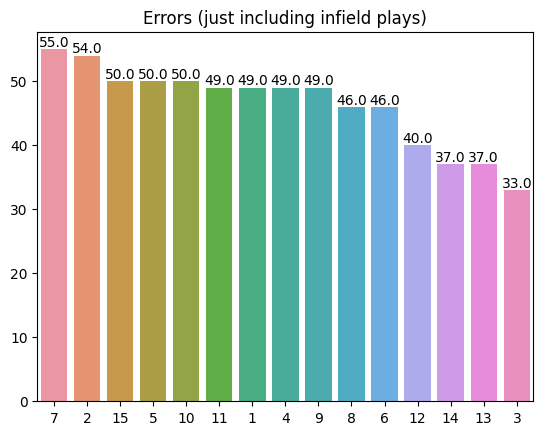

In [10]:
err_data = infield_data[(~infield_data['bounce_pos_x'].isna()) & (infield_data['batter_result'] != 'out')]
team_err_count = err_data['team_id'].value_counts()
ax = sns.barplot(x=team_err_count.index, y=team_err_count.values, order=team_err_count.index)
ax.bar_label(ax.containers[0], fmt='%.1f')
plt.title("Errors (just including infield plays)")
plt.show()

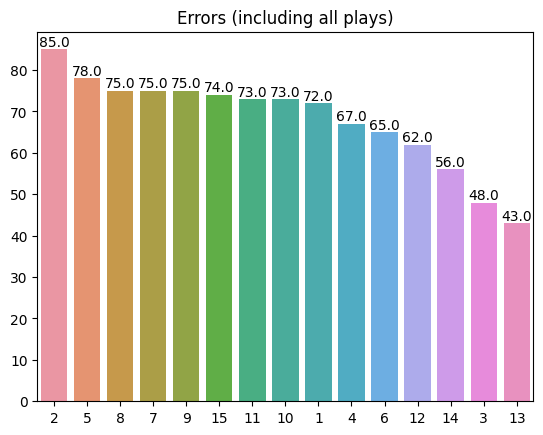

In [11]:
err_data = data[(~data['bounce_pos_x'].isna()) & (data['batter_result'] != 'out')]
team_err_count = err_data['team_id'].value_counts()
ax = sns.barplot(x=team_err_count.index, y=team_err_count.values, order=team_err_count.index)
ax.bar_label(ax.containers[0], fmt='%.1f')
plt.title("Errors (including all plays)")
plt.show()

## 3. For all infield throws with the distance of the throw being in the top 90th percentile,

In [12]:
infield_data_c = data[data['thrower_position'].isin([2,3,4,5,6])]
infield_data_c['throw_dist_from_1b'] = infield_data_c.apply(lambda x: math.dist([90,90],[x['throw_pos_x'],x['throw_pos_y']]), axis=1)
perc_90 = np.percentile(infield_data_c['throw_dist_from_1b'], 90)
throw_above_90 = infield_data_c[infield_data_c['throw_dist_from_1b']>perc_90]
throw_team_90 = throw_above_90.groupby('team_id')['throw_id','throw_dist_from_1b','exchange_time']
mean_team_90 = throw_team_90.mean().sort_values('exchange_time')
std_team_90 = throw_team_90.std().sort_values('exchange_time', ascending=False)

###  a. What team had the best average exchange time?

In [13]:
mean_team_90

,throw_id,throw_dist_from_1b,exchange_time
team_id,,,
9,15030.250000,163.632666,1.133366
6,16900.882979,164.177167,1.159883
15,16477.050000,162.338239,1.179229
2,16260.218182,163.875907,1.196718
4,16272.160377,163.908090,1.203094
10,17112.238095,162.472370,1.207905
13,16859.752294,163.632381,1.209165
11,15553.401460,163.220840,1.212569
1,17958.000000,163.308165,1.217043


###  b. Which team had the largest variation in exchange time?

In [14]:
std_team_90

,throw_id,throw_dist_from_1b,exchange_time
team_id,,,
14,9370.062287,8.277450,0.638697
5,8991.161462,23.154975,0.506370
15,9668.237140,11.944180,0.454809
7,9507.427530,10.233576,0.445378
4,10088.943314,9.685684,0.444887
10,9795.210412,8.848236,0.413282
3,9431.964641,8.913402,0.408555
1,9557.241757,8.420085,0.407141
9,9206.125462,8.978456,0.394859


## 4. Correlation between Throw Velocity and Throw Distance for throws made less than 100 feet from first base?

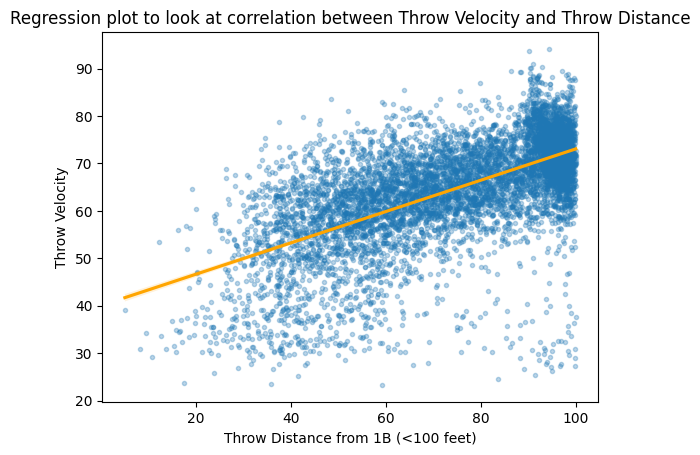

In [15]:
infield_data_c['throw_velo'] = infield_data_c.apply(lambda x: np.sqrt(np.square(x['throw_velo_x'])+np.square(x['throw_velo_y'])+np.square(x['throw_velo_z'])), axis=1)
throw_less_100 = infield_data_c[infield_data_c['throw_dist_from_1b']<100].loc[:,['throw_id','throw_velo','throw_dist_from_1b']]
sns.regplot(data=throw_less_100, x=throw_less_100['throw_dist_from_1b'], y=throw_less_100['throw_velo'], marker='.', scatter_kws={'alpha':0.3}, line_kws={"color": "orange"})
plt.title('Regression plot to look at correlation between Throw Velocity and Throw Distance')
plt.xlabel('Throw Distance from 1B (<100 feet)')
plt.ylabel('Throw Velocity')
plt.show()

In [16]:
print('The correlation between the throw velocity and throw distance (for throws <100 feet) is ',throw_less_100.corr()['throw_velo']['throw_dist_from_1b'])

The correlation between the throw velocity and throw distance (for throws <100 feet) is  0.6248264349139229
